# Week 3 Assignment: Cat Classification

-------

## <font color="red"> <참고사항> 

### 3주차와 4주차의 과제 난이도가 입문자들에게는 매우 높습니다. 그럼에도 하는 이유가 뭘까요?
    
#### 1. Neural Network의 구조에 대해 어느 정도 알아야 tensorflow로 구현할 수 있습니다.
- 하지만 5주차 초반부까지 가야 Neural Network의 구조에 대해 다 배웁니다.
    
- 그래서 실질적으로 더 열심히 하셔야 하는 과제는 5주차 이후의 과제들입니다.
 
#### 2. 그 전까지는 여러분들이 python과 numpy에 대해 실습을 통해 공부할 필요가 있습니다.
- 3~4주차 과제를 하시면서 모르는 부분들이 많을 것입니다.
    
- 이 부분을 직접 찾아보거나 튜터에게 질문을 하며 과제를 구현하게 되면 향후 python 실력이 5주차 실습을 하기에 충분해집니다.
    
#### 3. 또한, 이 과제는 코세라 내용을 기반으로 하기 때문에 배운 내용을 간접적으로 한 번 더 복습할 수 있는 계기가 됩니다.
    
### <font color="coral"> **결론 1:** python 공부와 강의 복습을 목적으로 이 과제를 최대한 해결하되 
### <font color="coral"> 과제를 다 해결하지 못해도 tensorflow 구조가 이보다 쉽기 때문에 충분히 5주차 이후 실습이 가능합니다.
    
    
### <font color="coral"> **결론 2:** 빈칸이 이외의 셀은 알지 못해도 됩니다. (필요한 부분은 수업시간에 안내합니다.)

----------

## assignment 관련 설명 (꼭 읽어보시고 시작하시기 바랍니다.)

### <font color="red"> 0. 로컬 컴퓨터에서 진행하시는 경우 폴더 통째로 받아서 'images' 폴더랑 'Week 3 Assignment.ipynb'를 같은 폴더에 넣고 시작하셔야 합니다.

### 1. 기본

1) 기본: 'shift + enter' 로 각 셀을 실행합니다.

2) ###START CODE HERE ### 와 ### END CODE HERE ### 사이의 빈 칸에 답을 적으시면 됩니다.

3) (= X lines of code) 라고 적혀 있으면, X개의 줄 만큼의 답을 적으시면 됩니다. (물론 x개의 줄이 아니어도 정답일 수 있습니다.)

4) 빈칸 이외의 부분은 건드리지 말아주세요.

5) 셀은 위에서부터 **순서대로** 실행해주세요.

6) 여유가 되신다면 빈칸 이외의 부분도 관심을 가지고 공부하는 것도 추천드립니다.

#### 7) 문제와 주석을 꼼꼼히 읽어보시면 분명 hint가 나옵니다.  

### 2. 자꾸 error 가 날 때
  
1) 처음부터 끝까지 순서대로 다시 실행 (특히, import 했는지 확인해보기)

2) 문제를 잘 읽었는지 확인해보기

3) 대소문자를 구별해서 적었는지 확인해주세요.

4) 튜터에게 error 부분 스샷 잘 찍어서 질문하기

### 3. 셀이 실행 안 될 때

1) 좌측 상단에서 kernel -> Restart kernel 실행

------------

## 1. Import Packages ##

<중요한 라이브러리>
- [numpy](www.numpy.org)는 2주차 수업 때 간단히 배웠으며 ndarray를 다루는 라이브러리입니다.
- [matplotlib](http://matplotlib.org)은 셀 안에 그래프 혹은 그림을 그려줘서 향후 여러분들이 많이 쓰게 될 라이브러리이며 9주차에 특강으로 학습하실 수 있습니다.

<알지 못해도 되는 라이브러리>
- [h5py](http://www.h5py.org)는 H5 파일을 다루는 라이브러리이며 향후 딥러닝 NN구조와 parameter를 저장할 때 H5 파일 형태로 저장합니다.
- [PIL](http://www.pythonware.com/products/pil/) and [cv2(opecnv)](https://opencv.org/) 는 마지막에 보너스로 여러분의 이미지를 test할 때 쓰이는 이미지 다루는 라이브러리입니다.


이 라이브러리들을 사용하기 위해 아래 셀을 실행해주어야 합니다.  

혹시 "No module named 'cv2'" 라는 에러가 뜬다면  

    !pip install opencv-python
이라는 명령어를 실행시켜서 opencv 라이브러리를 설치해주세요.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import PIL.Image as pilimg

%matplotlib inline

In [2]:
!pip install opencv-python

     |████████████████████████████████| 52.6MB 5.9MB/s eta 0:00:013


-----

## 2. Data (업로드, 확인, 전처리) ##

### 2-1) data 업로드

아래 셀을 colab에서 구글 드라이브로 실행할 경우는
우선 아래 코드를 통해 google drive를 mount 하신 뒤에  
```python
from google.colab import drive
drive.mount('/content/gdrive')
```
/content/gdrive/My Drive/ 폴더에, 즉 '내 드라이브' 폴더에 image 폴더를 두신 뒤, load_dataset 함수의 정의 부분에서 train_dataset과 test_dataset을 불러오는 부분을  
```python
train_dataset = h5py.File('/content/gdrive/My Drive/images/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/gdrive/My Drive/images/test_catvnoncat.h5', "r")
```
로 고쳐주시면 됩니다.
혹은 아래 코드를 통해 working directory를 현재 폴더로 하셔도 됩니다. ('working_directory_path' 대신 현재 폴더의 path를 적어주세요)
```python
import os
os.chdir('working_directory_path')
```

In [2]:
import os
os.getcwd()
os.chdir('/Users/jangjinwoong/Downloads/미래연구소(인공지능)/3주차/week3 assignment')
def load_dataset():
    train_dataset = h5py.File('/Users/jangjinwoong/Downloads/미래연구소(인공지능)/3주차/week3 assignment/images/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y= np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/Users/jangjinwoong/Downloads/미래연구소(인공지능)/3주차/week3 assignment/images/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array([b'non-cat',
                        b'cat']) # the list of classes
    
    train_set_y= train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

**data에 대한 이해**: You are given a dataset ("data.h5"에 저장되어 있음) containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

**<부연>**

1) training set은 우리의 모델을 학습시키기 위해 사용하는 dataset

2) test set은 학습된 모델이 학습하지 않은 data(test data)에서도 일관되게 성능이 나오는지 확인하기 위한 data (일반성을 확보하기 위해 존재) (5주차에 배웁니다.)

3) 이미지 1개 (x(i))의 shape = (num_px, num_px, 3)이다.
- (3은 RGB 채널 각각을 의미)
- (num_px,num_px) = 세로 픽셀 수(행의 개수), 가로 픽셀 수(열의 개수)

4) train_set_x_orig에는 training data(shape=num_px, num_px, 3)가 m개 있다.
 **=> train_set_x_orig.shape = (m, num_px, num_px, 3)**

5) 실제 data 업로드 방법은 이와 다르니 위의 업로드를 유심히 보지 않아도 됩니다.

6) "_orig"는 문제를 만든 사람이 아직 data가 전처리(preprocess)가 안 되었다는 것을 알려주기 위해 변수 이름에 덧붙였다.

(물론 ndarray가 어떻게 생겼을지는 아무도 모릅니다. 그래서 항상 shape을 찍어보는 습관을 들이기 바랍니다.)

(이를 통해 향후 2주의 과제로 ndarray에 익숙해지는 시간을 가지기 바랍니다.)

### 2-2) data 확인

#### matplotlib.pyplot가 주로 사용되는 2가지
- data 업로드가 잘 되었는지 확인
- 학습이 잘 되었는지 그래프 그릴 때

y = [1], it's a 'cat' picture.


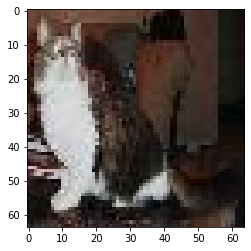

In [4]:
# Example of a picture
index = 40
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

딥러닝에서의 많은 버그들은 matrix/vector의 차원이 서로 맞지 않기 때문에 발생합니다. 만약 matrix/vector의 차원을 제대로 잡을 수 있으면 수많은 버그를 예방하실 수 있습니다.

## <font color="blue"> Question 1

**문제:** 아래의 값에 적당한 값을 할당하시오:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

**힌트:** `train_set_x_orig.shape` = (m_train, num_px, num_px, 3). 예를 들어, `m_train`은 `train_set_x_orig.shape[0]`를 통해 접근할 수 있습니다.

In [5]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 200
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (200, 64, 64, 3)
train_set_y shape: (1, 200)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**값이 오른쪽 table과 같다면 정답입니다**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 200 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


### 2-3) data preprocess 

#### 1> flatten

image dataset은 4d array

image 자체는 3d array이지만 이를 딥러닝 모델 안에 넣으려면 1d array꼴로 만들어야 넣을 수 있습니다.

그래서 (num_px, num_px, 3)에서 (num_px $*$ num_px $*$ 3, 1)꼴로 만들어야 합니다. 3주차에 배운 numpy 함수로 구현해봅니다.

## <font color="blue"> Question 2

**문제:** training and test data sets을 reshape해서 images of size (num_px, num_px, 3)가 (num\_px $*$ num\_px $*$ 3, 1) 형태로 되게 한다.

**hint:** A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [6]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 200)
train_set_y shape: (1, 200)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 200)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 200)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
</table>

#### 2> normalization

image의 pixel 값은 모두 0~255의 값을 가집니다.

경험적으로 이미지 픽셀값의 범위를 0~1로 만들면 학습이 잘 됩니다. 

좀 더 자세한 사항은 7주차에 안내하겠습니다. 그 때는 이미지 말고 csv파일도 normalize 해보는 구체적인 방법도 배울 수 있습니다.

In [7]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**기억하셔야 할 것:**

데이터 전처리(pre-processing)를 위한 step은 다음과 같습니다:
- 문제의 dimension과 shape 확인(m_train, m_test, num_px, ...)
- 각각의 example이 (num_px \* num_px \* 3, 1) 모양이 되도록 데이터셋을 reshape하기
- 데이터를 "Normalize"하기

---

## 3. General Architecture of the learning algorithm ##

Logistic regression을 사용해서 고양이 사진인지 아닌지를 분간하는 간단한 모델을 만들어보겠습니다.  


<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**알고리즘의 수학적 표현**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

모든 training example에 대한 cost의 합을 구하고 examples의 개수로 나누기:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**핵심 Step**:    

    - Initialize the parameters of the model  
    - Learn the parameters for the model by minimizing the cost    
    - Use the learned parameters to make predictions (on the test set)  
    - Analyse the results and conclude  

----------

## 4. Building the parts of our algorithm ## 

Neural Network를 만들기 위한 main step은 다음과 같습니다:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. loop:
    - Calculate current loss (forward propagation)
    - Compute cost function
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

위 3가지 과정을 있다가 밑에서 `model()`이라는 함수에서 한 번에 진행합니다.

이를 위해서는 `model()` 함수에 들어갈 부품들을 차례차례 만들어봅니다. 딥러닝의 5가지 step을 떠올려보면서 진행해도 좋습니다.

### 4-0) Build sigmoid function

## <font color="blue"> Question 3

**문제:** 아래 식을 갖는 `sigmoid()`함수를 만들어보시오.
- $ sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}} $ 
- np.exp()를 사용해서 만들어보시오.

In [8]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 /( 1 + (1/np.exp(z)))   #답지에는 s = 1/(1+ np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**값이 오른쪽 table과 같다면 정답입니다**:  

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4-1) Initializing parameters

## <font color="blue"> Question 4

**Exercise:** 함수 내부에 있는 주석에 맞게 parameter를 initialization 하시오.
- w는 np.zeros()를 사용해서 initialization 하시오. (dim이라는 해당 함수의 parameter를 사용하시오.)
- b는 0을 대입하시오.

In [10]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b =0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**값이 오른쪽 table과 같다면 정답입니다**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4-2) Forward and Backward propagation

위에서 parameter initialization하는 함수를 만들었으니 다음 step인 forward, backward propagation을 하는 함수를 만듭니다.

## <font color="blue"> Question 5

**문제:** cost function과 gradient를 계산하고 있는 `propagate()`함수를 완성하시오.

**hints**: 아래 식들을 numpy를 통해 구현하시오. (이 식을 외우지 않아도 됩니다. 구현할 줄만 알면 됩니다.)
- (forward propagation) $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- (compute cost function) $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

- 아래의 두 공식을 사용하시면 됩니다: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7} $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8} $$

In [12]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)                                                                       # compute activation
    cost = (-1/m) *np.sum(Y*np.log(A) + (1-Y)* (np.log(1-A)))                                                                     # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4-3) Optimization (Gradient descent)
 
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

## <font color="blue"> Question 6

**Exercise:** gradient descent 식을 완성한다.
    
**hint:** For a parameter $w$, the update rule is $ w = w - \alpha \text{ } dw$, where $\alpha$ is the learning rate.
    

In [15]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591] 
     [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

## <font color="blue"> Question 7

이전 `optimize()` 함수는 학습된 w와 b를 출력한다. 이제는 이 w와 b로 x(image)의 y(label)를 예측해야한다.    
    
**문제:** 아래 조건을 만족하는 `predict()`함수를 완성하시오. 

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. A의 각 원소들을 0 (if activation <= 0.5) 또는 1 (if activation > 0.5) 변환하고, 이 값들을 `Y_prediction` vector에 할당하시오. 
    
**hint:** If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [19]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples   in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0 # 1줄 답
        '''
        if A[0, i]>0.5 :
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        '''
        
        
        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [20]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**기억하셔야 할 것:**  
    
지금까지 다음과 같은 함수들을 만드셨습니다:  
- Initialize (w,b)  
- Optimize the loss iteratively to learn parameters (w,b):  
    - computing the cost and its gradient   
    - updating the parameters using gradient descent  
- Use the learned (w,b) to predict the labels for a given set of examples

---------

## 5. Merge all functions into a model ##

### 5-1) training & test model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

## <font color="blue"> Question 8

**문제:** 아래 조건을 만족하는 `model()`함수를 완성하시오.
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()
    
**hint:** 기존에 위에서 만든 함수들을 여기서 합쳐서 Neural Network(모델)를 만듭니다.

In [23]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w,b, X_train, Y_train, num_iterations, learning_rate, print_cost=True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b, X_test)
    Y_prediction_train = predict(w,b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [24]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.0025, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.423440
Cost after iteration 200: 0.353499
Cost after iteration 300: 0.310512
Cost after iteration 400: 0.279283
Cost after iteration 500: 0.254729
Cost after iteration 600: 0.234525
Cost after iteration 700: 0.217417
Cost after iteration 800: 0.202649
Cost after iteration 900: 0.189723
Cost after iteration 1000: 0.178293
Cost after iteration 1100: 0.168105
Cost after iteration 1200: 0.158963
Cost after iteration 1300: 0.150716
Cost after iteration 1400: 0.143239
Cost after iteration 1500: 0.136432
Cost after iteration 1600: 0.130211
Cost after iteration 1700: 0.124506
Cost after iteration 1800: 0.119255
Cost after iteration 1900: 0.114409
train accuracy: 99.0 %
test accuracy: 82.0 %


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:40%"> 
    <tr>
        <td> **Cost after iteration 0**  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.0 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 82.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

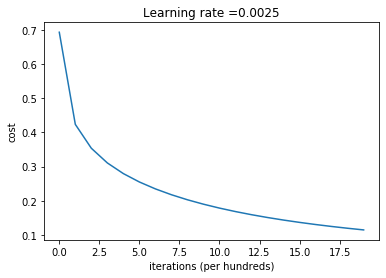

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**생각해보기:**
- training accuracy는 100%에 가깝습니다.
- test accuracy는 82%입니다.
- 이 모델은 좋은 모델일까요? 
- 지금 현상을 뭐라고 할까요? 궁금하신 분은 'overfitting'을 검색해보셔도 좋습니다. 이는 5주차에 배웁니다.

매주마다 점차 더 깊은 모델에 도전해봅니다.

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations(3000으로) in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called **overfitting.** 

### 5-2) test set 하나씩 test

y = [0], you predicted that it is a "non-cat" picture.


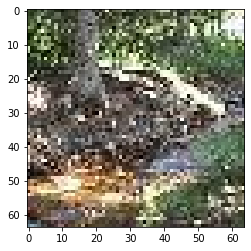

In [27]:
# Example of a picture that was wrongly classified.
index = 10
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[:,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

-------

## (Bonus) 6. Test with your own image (optional/ungraded exercise) ##

여기까지 완수하신 걸 축하드립니다. 이제 자신만의 image를 가지고 지금까지 만든 모델이 어떻게 예측을 하는지 알아볼 수 있습니다:
   1. 여러분의 이미지를 "images" 폴더 안에 넣습니다.
   2. 그 이미지의 이름을 "my_image.jpg"로 설정합니다. (확장자가 png 등이면 실행 불가 / 반드시 jpg여야 합니다.)
   3. 코드를 실행하면 여러분의 이미지가 고양이인지 판별합니다.(1 = cat, 0 = non-cat)!

y = 1.0, your algorithm predicts a "cat" picture.


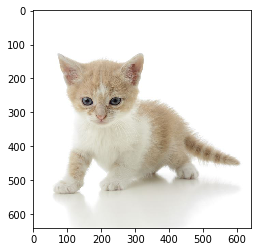

In [28]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = pilimg.open(fname)
image = np.array(image)
image = image/255.
my_image = cv2.resize(image, dsize=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

마지막으로, 지금까지 구현한 모델을 통해 아래의 것들을 시도해보실 수도 있습니다.  
- Play with the learning rate and the number of iterations
- Try different initialization methods and compare the results
- Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c